In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
import clip
import torch

from myMiniImageNet import create_dataset

In [2]:
dataset = create_dataset('../../data/miniImageNetMap-mine.txt')

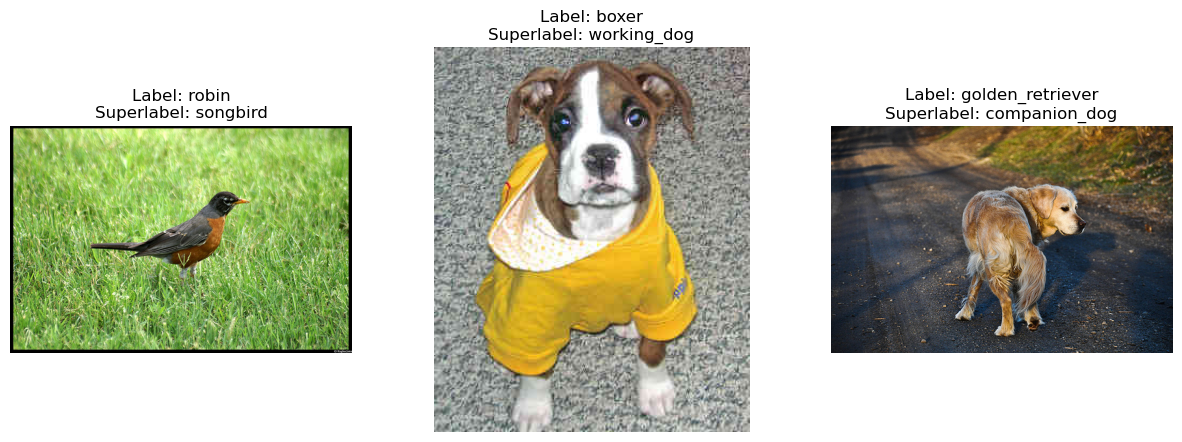

In [3]:
# Select 3 random images
selected_images = random.sample(dataset, 3)

# Plot the images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, image_info in enumerate(selected_images):
    axs[i].imshow(image_info['image'])
    axs[i].set_title(f"Label: {image_info['label']}\nSuperlabel: {image_info['superlabel']}")
    axs[i].axis('off')

plt.show()

In [7]:
model, preprocess = clip.load('ViT-B/32', device=device)

/home/andrea/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
labels = []
predictions = []
for image_info in dataset:
    image_input = preprocess(image_info['image']).unsqueeze(0).to(device)

    text_input = clip.tokenize([f"A photo of a {image_info['label']}, which is a type of {image_info['superlabel']}"]).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_input)
        logits_per_image, logits_per_text = model(image_input, text_input)
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    labels.append(image_info['label'])
    predictions.append(probs[0][0])

KeyboardInterrupt: 